In [1]:
#importovanje neophodnih biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#scikit learn preprocesiranje
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
#scikit learn selekcija feature-a
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
#scikit learn izbor modela
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
#sklearn metrike 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#sklearn modeli
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, LassoCV, ElasticNetCV
from sklearn.kernel_ridge import KernelRidge
#sklearn model selection
from sklearn.model_selection import GridSearchCV
#sklearn za crossvalidation
from sklearn.model_selection import cross_val_score, cross_validate
#auto-sklearn
#import autosklearn.classification
#import autosklearn.regression
#scikit learn neuronske mreze
from sklearn.neural_network import MLPClassifier
#sklearn genetic-opt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn_genetic import GAFeatureSelectionCV
#feature reduction sa PCA
from sklearn.decomposition import PCA
#za handlovanje nebalansiranih datasetova
from imblearn.over_sampling import SMOTE
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
#ucitavanje podataka
file_name = "./datasets/addiction_nova.csv"
data = pd.read_csv(file_name, na_values = ' ')
data.head(10)

,ID,Pol,Godine,SkolaPoTipu,SkolaPoRegionu,Uspeh,EkonomskiPolozaj,ImaKomp,ZadovoljanPristupom,KolikoDugo,...,Internet16,Internet17,Internet18,NKP,PI,SPO,PUI,PUIcutoff,CutOff3940,CutOff4950
0,1,0.0,17.0,1,1,3.0,3.0,0.0,1.0,9.0,...,5.0,5.0,NaN,NaN,16.0,11.0,NaN,NaN,NaN,NaN
1,2,0.0,17.0,1,1,4.0,4.0,0.0,1.0,5.0,...,1.0,2.0,1.0,13.0,7.0,5.0,25.0,0.0,0.0,0.0
2,3,0.0,17.0,1,1,4.0,3.0,0.0,1.0,9.0,...,3.0,1.0,1.0,13.0,9.0,6.0,28.0,0.0,0.0,0.0
3,4,0.0,17.0,1,1,4.0,3.0,0.0,1.0,7.0,...,4.0,1.0,1.0,12.0,14.0,5.0,31.0,0.0,0.0,0.0
4,5,0.0,17.0,1,1,4.0,1.0,1.0,0.0,2.0,...,2.0,1.0,2.0,12.0,9.0,7.0,28.0,0.0,0.0,0.0
5,6,0.0,17.0,1,1,4.0,3.0,0.0,1.0,6.0,...,4.0,1.0,2.0,17.0,10.0,5.0,32.0,0.0,0.0,0.0
6,7,0.0,16.0,1,1,4.0,5.0,0.0,1.0,5.0,...,1.0,2.0,2.0,12.0,7.0,5.0,24.0,0.0,0.0,0.0
7,8,0.0,16.0,1,1,3.0,5.0,0.0,1.0,8.0,...,2.0,1.0,1.0,13.0,12.0,6.0,31.0,0.0,0.0,0.0
8,9,1.0,17.0,1,1,5.0,2.0,0.0,1.0,5.0,...,5.0,2.0,4.0,32.0,20.0,9.0,61.0,1.0,1.0,1.0
9,10,0.0,16.0,1,1,4.0,1.0,0.0,0.0,6.0,...,4.0,1.0,1.0,9.0,10.0,4.0,23.0,0.0,0.0,0.0


In [3]:
#provera da li ima duplikata
print('Broj pronadjenih duplikata: ' + str(data.duplicated().sum()))

Broj pronadjenih duplikata: 0


In [4]:
#sredjivanje kolona
#kolone ID, TEMPS1 do TEMPS36, NKP, PI, SPO, CutOff4950, EnergetskoP2 i Temper_bin ne ulaze u analizu
temp_cols=[]
for col in data.columns:
    if col.startswith('TEMPS'):
        temp_cols.append(col)
out_cols = ['ID','NKP','PI','SPO', 'CutOff4950', 'EnergetskoP2', 'Temper_bin','SkolaPoRegionu','SkolaPoTipu','Komunikacija1','Komunikacija2','Komunikacija3','Komunikacija4','ImaKomp','ZadovoljanPristupom','BrojaMailovaPrim','BrojaMailovaPosl','ZaStaMail','ImaNemaFB','PusacKolikoGodina','PusacKolikoCigareta','Godine','DaLiSeDrogira']
for col in out_cols:
    temp_cols.append(col)
new_data = data.drop(temp_cols, axis=1)
#preimenovanje kolone
new_data.rename(columns = {'CutOff3940':'Cutoff_Class'}, inplace=True)

In [5]:
#eliminacija Internet kolona (Internet1 -> Internet18)
internet_cols=[]
for col in new_data.columns:
    if col.startswith('Internet'):
        internet_cols.append(col)
new_data = new_data.drop(internet_cols, axis=1)
print('Novi broj kolona nakon eliminacije: {}'.format(len(new_data.columns)))

Novi broj kolona nakon eliminacije: 59


In [6]:
#provera koliko ima NaN vrednosti
print(new_data.isna().sum().sort_values(ascending=False))
#za Cutoff_Class kolonu postoji 104 NaN vrednosti, to je otprilike 5% celokupnog dataset-a
#brisemo redove koji imaju NaN vrednost u Cutoff_Class koloni
new_data = new_data.dropna(subset=['Cutoff_Class', 'PUI'])

Cutoff_Class                  104
PUIcutoff                     104
PUI                           104
BrojaSatiFB                    95
KolikoDugo                     91
FizAkt3                        86
KolikNajduze                   72
Aktivnost1                     60
Aktivnost4                     59
FizAkt2                        55
Aktivnost10                    54
Aktivnost14                    54
Sadrzaj8                       53
Aktivnost3                     52
Aktivnost7                     49
Aktivnost11                    48
Grickalice                     46
Sadrzaj13                      45
Sadrzaj10                      43
Sadrzaj7                       43
Sadrzaj2                       43
Sadrzaj4                       42
EnergetskoP1                   41
Sadrzaj11                      40
Sadrzaj6                       40
Sadrzaj5                       40
Aktivnost12                    39
Sadrzaj12                      39
Aktivnost8                     39
Aktivnost13   

In [7]:
#preimenovanje varijabli
mapiranje = {
    'Pol':'Gender',
    'Uspeh':'Achievement',
    'EkonomskiPolozaj':'Economic status',
    'KolikoDugo':'Internet Use (in years)',
    'KolikoNedeljno':'Internet Use (hours per week)',
    'KolikNajduze':'Internet Use (hours per day)',
    'Predhodnih6meseci':'Internet Use (in holiday)',
    'DaMozeDaLiBi':'Attitude about time on the Internet',
    'Sadrzaj1':'Politics',
    'Sadrzaj2':'Business',
    'Sadrzaj3':'Sports',
    'Sadrzaj4':'Computers and technology',
    'Sadrzaj5':'Arts and culture',
    'Sadrzaj6':'Education',
    'Sadrzaj7':'Pop culture',
    'Sadrzaj8':'Pornography',
    'Sadrzaj9':'Music',
    'Sadrzaj10':'Travel/tourism',
    'Sadrzaj11':'Health and medicine',
    'Sadrzaj12':'Science',
    'Sadrzaj13':'Religion',
    'Aktivnost1': 'Communication by e-mail',
    'Aktivnost2':'Social networks',
    'Aktivnost3':'Communication on the forum',
    'Aktivnost4':'Communication on the blog',
    'Aktivnost5':'Targeted Internet search',
    'Aktivnost6':'Surfing',
    'Aktivnost7':'Expert Advice',
    'Aktivnost8':'Search for favorite websites',
    'Aktivnost9':'Reading the news',
    'Aktivnost10':'Online games',
    'Aktivnost11':'Reading and downloading books and texts',
    'Aktivnost12':'Downloading music and movies',
    'Aktivnost13': 'Internet for school',
    'Aktivnost14':'Online courses',
    'DaLiSvakodnevnoFb':'Everyday FB use',
    'BrojaSatiFB':'Average time spent on FB',
    'FBigraIgrice':'FB use –gaming',
    'FBcetuje':'FB use – chatting',
    'FBgrupe':'FB use – visiting groups',
    'FBcitaPostove':'FB use - reading posts',
    'FBpiseStatuse':'FB use - publishing statuses',
    'FBdeliMuzikuFotografijeIsl':'FB use - sharing music, photos etc.',
    'FizAkt1':'Sports – days in a  week',
    'FizAkt2':'Sports – intensity',
    'FizAkt3':'Sports – in minutes',
    'EnergetskoP1':'Energy drinks',
    'EnergetskoP2': 'Energy drinks (ml)',
    'Grickalice':'Fast Food',
    'Pusac':'Smoker',
    'Kafa_bin':'Coffee',
    'Alkohol_bin':'Alcohol',
    'Depresivan':'Drepressive temperament',
    'Ciklotimicni':'Cyclothymic temperament',
    'Hipertimicni':'Hyperthymic temperament',
    'Iritabilni':'Irritable temperament',
    'Anksiozni':'Anxiety temperament'
}
new_data = new_data.rename(columns=mapiranje)
print(new_data.columns)

Index(['Gender', 'Achievement', 'Economic status', 'Internet Use (in years)',
       'Internet Use (hours per week)', 'Internet Use (hours per day)',
       'Internet Use (in holiday)', 'Attitude about time on the Internet',
       'Politics', 'Business', 'Sports', 'Computers and technology',
       'Arts and culture', 'Education', 'Pop culture', 'Pornography', 'Music',
       'Travel/tourism', 'Health and medicine', 'Science', 'Religion',
       'Communication by e-mail', 'Social networks',
       'Communication on the forum', 'Communication on the blog',
       'Targeted Internet search', 'Surfing', 'Expert Advice',
       'Search for favorite websites', 'Reading the news', 'Online games',
       'Reading and downloading books and texts',
       'Downloading music and movies', 'Internet for school', 'Online courses',
       'Everyday FB use', 'Average time spent on FB', 'FB use - reading posts',
       'FB use - publishing statuses', 'FB use - sharing music, photos etc.',
       'FB 

In [8]:
#kolone sa samo binarnim vrednostima
zero_one = ['Gender','Internet Use (hours per week)',
                 'Attitude about time on the Internet','Everyday FB use',
                 'FB use - reading posts','FB use - publishing statuses','FB use - sharing music, photos etc.', 
                 'FB use –gaming','FB use – chatting','FB use – visiting groups','Energy drinks','Fast Food','Smoker',
                 'Coffee','Alcohol','PUI']

zero_one_with_NaN = list()
for col in new_data[zero_one]:
    if(new_data[col].isna().sum()>0):
        zero_one_with_NaN.append(col)
#provera koje od ovih kolona imaju NaN vrednosti
print(new_data[zero_one].isna().sum().sort_values(ascending=False))

Fast Food                              39
Energy drinks                          33
Internet Use (hours per week)          30
Attitude about time on the Internet    24
Everyday FB use                        24
Coffee                                 24
Smoker                                 16
Alcohol                                16
Gender                                  1
FB use - reading posts                  0
FB use - publishing statuses            0
FB use - sharing music, photos etc.     0
FB use –gaming                          0
FB use – chatting                       0
FB use – visiting groups                0
PUI                                     0
dtype: int64


In [9]:
#zamena vrednosti za kolone sa binarnim vrednostima koje imaju NaN vrednosti
for col in new_data[zero_one_with_NaN].columns:
    zero_row_num = new_data[col].value_counts()[0.0]
    one_row_num = new_data[col].value_counts()[1.0]
    if (zero_row_num > one_row_num):
        swap_value = 0
    else:
        swap_value = 1
    new_data[col] = new_data[col].fillna(swap_value)
print(new_data[zero_one_with_NaN].isna().sum().sort_values(ascending=False))

Gender                                 0
Internet Use (hours per week)          0
Attitude about time on the Internet    0
Everyday FB use                        0
Energy drinks                          0
Fast Food                              0
Smoker                                 0
Coffee                                 0
Alcohol                                0
dtype: int64


In [10]:
#kolone gde se iste vrednosti pojavljuju cesto
repeat_value_cols = ['Achievement','Economic status','Internet Use (hours per day)',
                     'Internet Use (in holiday)','Sports – days in a  week','Sports – intensity']
sadrzaj_cols = ['Politics','Business','Sports','Computers and technology','Arts and culture','Education','Pop culture','Pornography',
               'Music','Travel/tourism','Health and medicine','Science','Religion']
aktivnost_cols = ['Communication by e-mail','Social networks','Communication on the forum','Communication on the blog',
                 'Targeted Internet search','Surfing','Expert Advice','Search for favorite websites','Reading the news',
                 'Online games','Reading and downloading books and texts','Downloading music and movies','Internet for school','Online courses']
repeat_value_cols = repeat_value_cols + sadrzaj_cols + aktivnost_cols
print(repeat_value_cols)

['Achievement', 'Economic status', 'Internet Use (hours per day)', 'Internet Use (in holiday)', 'Sports – days in a  week', 'Sports – intensity', 'Politics', 'Business', 'Sports', 'Computers and technology', 'Arts and culture', 'Education', 'Pop culture', 'Pornography', 'Music', 'Travel/tourism', 'Health and medicine', 'Science', 'Religion', 'Communication by e-mail', 'Social networks', 'Communication on the forum', 'Communication on the blog', 'Targeted Internet search', 'Surfing', 'Expert Advice', 'Search for favorite websites', 'Reading the news', 'Online games', 'Reading and downloading books and texts', 'Downloading music and movies', 'Internet for school', 'Online courses']


In [11]:
#zamena nedostajucih vrednosti kod kolona gde se iste vrednosti pojavljuju cesto
repeat_cols_with_NaN = list()
for col in new_data[repeat_value_cols]:
    if(new_data[col].isna().sum()>0):
        repeat_cols_with_NaN.append(col)
        
for col in new_data[repeat_cols_with_NaN]:
    mode = new_data[col].mode()[0]
    new_data[col] = new_data[col].fillna(mode)
print(new_data[repeat_cols_with_NaN].isna().sum().sort_values(ascending=False))

Achievement                                0
Science                                    0
Internet for school                        0
Reading and downloading books and texts    0
Online games                               0
Reading the news                           0
Search for favorite websites               0
Expert Advice                              0
Surfing                                    0
Targeted Internet search                   0
Communication on the blog                  0
Communication on the forum                 0
Social networks                            0
Communication by e-mail                    0
Religion                                   0
Health and medicine                        0
Economic status                            0
Travel/tourism                             0
Music                                      0
Pornography                                0
Pop culture                                0
Education                                  0
Arts and c

In [12]:
#zamena nedostajucih vrednosti kod kolona sa nebinarnim vrednostima sa srednjom vrednoscu
filter_cols = zero_one + repeat_value_cols
non_binary_cols = new_data.columns.difference(filter_cols).values
non_binary_cols_with_NaN = list()
for col in new_data[non_binary_cols]:
    if(new_data[col].isna().sum()>0):
        non_binary_cols_with_NaN.append(col)
for col in new_data[non_binary_cols_with_NaN]:
    mean = new_data[col].mean()
    new_data[col] = new_data[col].fillna(mean)

In [13]:
#provera da li nakon preprocesiranja ima NaN vrednosti
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ): print(new_data.isna().sum().sort_values(ascending=False))

Gender                                     0
Sports – intensity                         0
Internet for school                        0
Online courses                             0
Everyday FB use                            0
Average time spent on FB                   0
FB use - reading posts                     0
FB use - publishing statuses               0
FB use - sharing music, photos etc.        0
FB use –gaming                             0
FB use – chatting                          0
FB use – visiting groups                   0
Sports – days in a  week                   0
Sports – in minutes                        0
Online games                               0
Energy drinks                              0
Fast Food                                  0
Smoker                                     0
Coffee                                     0
Alcohol                                    0
Drepressive temperament                    0
Cyclothymic temperament                    0
Hyperthymi

In [14]:
#podesavanje input i output kolone
input_cols = new_data[new_data.columns.difference(['Cutoff_Class','PUIcutoff','PUI'])]
output_col = new_data['Cutoff_Class']

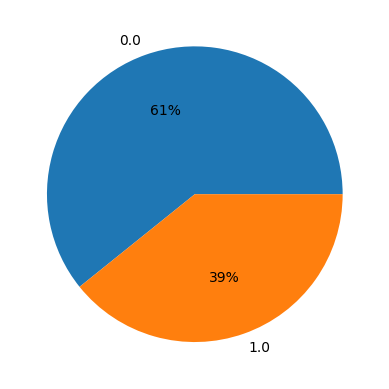

In [15]:
#pie chart za prikaz raspodele po klasama
labels = pd.unique(new_data['Cutoff_Class'])
countByClass = new_data.groupby('Cutoff_Class').size()
#colors = sns.color_palette('pastel')[0:2]
plt.pie(countByClass, labels = labels, autopct='%.0f%%')
plt.show()

In [16]:
#detekcija i eliminacija outlier vrednosti primenom isolation forest-a
def delete_outliers(data):
    isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.05, max_samples = 'auto')
    outlier_prediction = isolation_forest.fit_predict(data.values)
    print("Number of normal values detected: {}".format(outlier_prediction[outlier_prediction  == 1].sum()))
    print("Number of outliers detected: {}".format(abs(outlier_prediction[outlier_prediction == -1].sum())))
    data_no_outliers = data.copy()
    data_no_outliers['Is_Outlier'] = outlier_prediction
    data_no_outliers.drop(data_no_outliers[(data_no_outliers['Is_Outlier'] == -1)].index, axis = 0, inplace=True)
    data_no_outliers = data_no_outliers[data_no_outliers.columns.difference(['Is_Outlier'])]
    print('Number of values after eliminating outliers: ' + str(len(data_no_outliers)))
    return data_no_outliers
new_data_no_outliers = delete_outliers(new_data)

Number of normal values detected: 1908
Number of outliers detected: 101
Number of values after eliminating outliers: 1908


In [17]:
#normalizacija podataka -> normalizujemo sve kolone osim onih koje imaju samo binarne vrednosti 
cols_to_normalize = input_cols.columns.difference(zero_one)
min_max = MinMaxScaler()
new_data_norm = new_data_no_outliers.copy()
new_data_norm[cols_to_normalize] = min_max.fit_transform(new_data_norm[cols_to_normalize])

In [18]:
#standardizacija podataka, vazi isto sto i za normalizaciju
cols_to_standardize = input_cols.columns.difference(zero_one)
standard_scaler = StandardScaler()
new_data_standard = new_data_no_outliers.copy()
new_data_standard[cols_to_standardize] = standard_scaler.fit_transform(new_data_standard[cols_to_standardize])

In [19]:
#podela na train i test set
X_cols = new_data[new_data.columns.difference(['Cutoff_Class', 'PUIcutoff', 'PUI' ])]
y_col = new_data['Cutoff_Class']

X_cols_preprocessed = new_data_norm[new_data_norm.columns.difference(['Cutoff_Class', 'PUIcutoff', 'PUI' ])]
y_col_preprocessed = new_data_norm['Cutoff_Class']

#treniranje sa neobradjenim i preprocesiranim skupom
X_train, X_test, y_train, y_test = train_test_split(X_cols, y_col, test_size=0.3)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_cols_preprocessed, y_col_preprocessed, test_size=0.2)

Classification report sa svim feature-ima za PCA: 
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       242
         1.0       0.69      0.57      0.62       140

    accuracy                           0.75       382
   macro avg       0.73      0.71      0.72       382
weighted avg       0.74      0.75      0.74       382

Classification report sa redukovanim feature-ima za PCA: 
              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       242
         1.0       0.44      0.40      0.42       140

    accuracy                           0.60       382
   macro avg       0.56      0.56      0.56       382
weighted avg       0.59      0.60      0.59       382



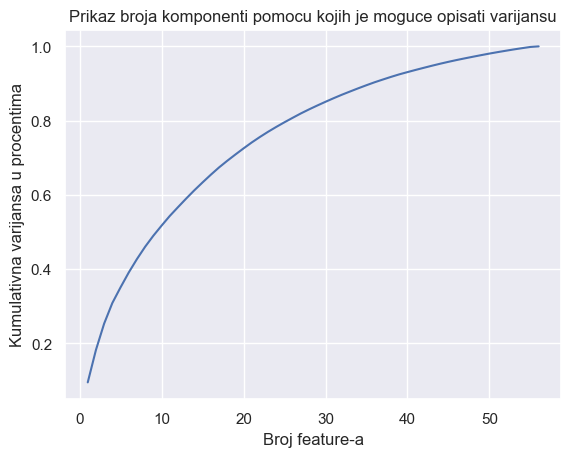

In [121]:
#primena principal component analysis na problem redukcije feature-a
pca = PCA(n_components = None)
X_train_new = pca.fit_transform(X_train_p)
X_test_new = pca.fit_transform(X_test_p)

fig, ax = plt.subplots()
x = np.arange(1,57, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Broj feature-a')
plt.ylabel('Kumulativna varijansa u procentima')
plt.title('Prikaz broja komponenti pomocu kojih je moguce opisati varijansu')
plt.plot(x,y)
clr = RandomForestClassifier()
clr.fit(X_train_p, y_train_p)

y_pred_pca = clr.predict(X_test_p)
accuracy = accuracy_score(y_test_p, y_pred_pca)
print('Classification report sa svim feature-ima za PCA: \n' + (classification_report(y_test_p, y_pred_pca)))

#broj komponenti predstavljen vrednoscu nakon koje se uocava zaravnjenje krive
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train_p)
X_test_pca = pca.fit_transform(X_test_p)
clr = RandomForestClassifier()
clr.fit(X_train_pca, y_train_p)

y_pred_pca = clr.predict(X_test_pca)
print('Classification report sa redukovanim feature-ima za PCA: \n' + (classification_report(y_test_p, y_pred_pca)))


Index(['Attitude about time on the Internet', 'Cutoff_Class',
       'Cyclothymic temperament', 'Internet Use (hours per day)',
       'Internet Use (hours per week)', 'Irritable temperament', 'PUI',
       'PUIcutoff'],
      dtype='object')


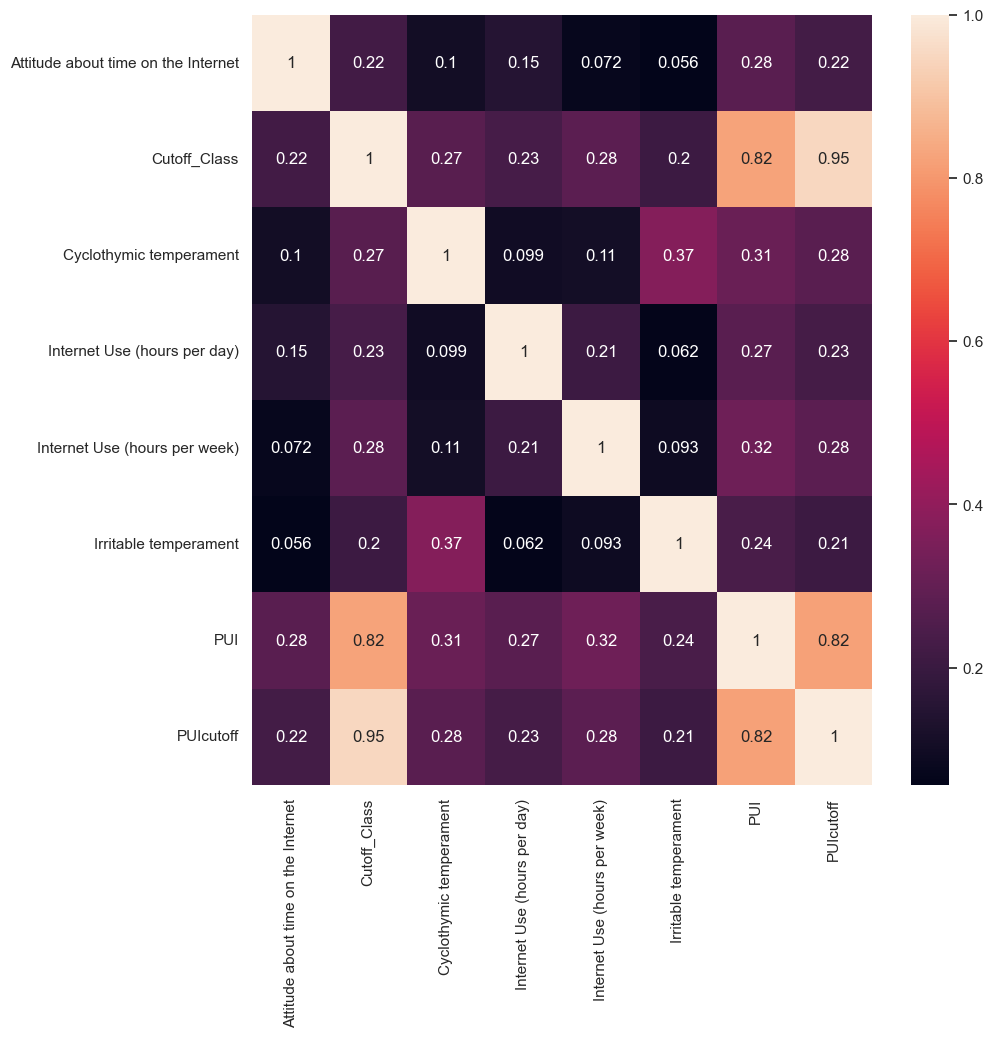

In [122]:
#prikaz heat mape gde se vide koeficijenti korelacije
def correlation_coef(corr_treshold):
    plt.figure(figsize=(10,10))
    correlation = new_data_norm.corr()
    correlation_treshold = correlation['Cutoff_Class']
    good_features = correlation_treshold[abs(correlation_treshold > corr_treshold )]
    print(str(good_features.keys()))
    #print(good_features.sort_values(ascending=False))
    sns.heatmap(new_data_norm[good_features.keys()].corr(), annot=True)
correlation_coef(0.2)

In [123]:
#DEO SA KLASIFIKACIJOM
#modeli bez podesavanja hiperparametara
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
grad_boost_class = GradientBoostingClassifier()

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)
Accuracy for model with all features: 0.75
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       242
         1.0       0.64      0.69      0.66       140

    accuracy                           0.75       382
   macro avg       0.73      0.73      0.73       382
weighted avg       0.75      0.75      0.75       382



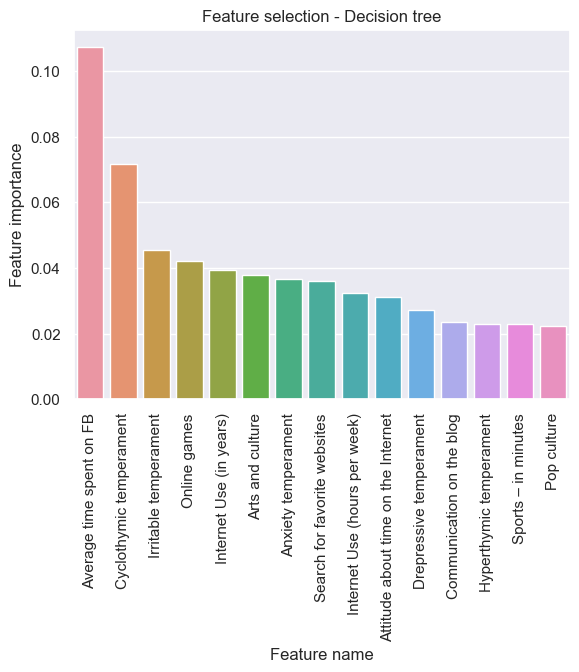

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)
Accuracy for model with feature selection: 0.76
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       242
         1.0       0.66      0.69      0.67       140

    accuracy                           0.76       382
   macro avg       0.74      0.74      0.74       382
weighted avg       0.76      0.76      0.76       382



In [136]:
#podesavanje hiperparametara za decision tree
parameters = {'max_leaf_nodes': list(range(2,10)), 
              'min_samples_split':[2,3,4],
              'max_depth': [2,3,5,10],
              'criterion': ['gini', 'entropy']}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela bez sa svim feature-ima
best_model= grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {:.2f}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa selekcijom najboljih feature-a
features_dtc = feature_selection_decision_tree(15)
best_model = grid_search_cv.fit(X_train_p[features_dtc], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_dtc])
print('Accuracy for model with feature selection: {:.2f}'.format(best_model.score(X_test_p[features_dtc], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
RandomForestClassifier(criterion='entropy', max_depth=9, max_features=6,
                       n_estimators=40)
Accuracy for model with all features: 0.74
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       242
         1.0       0.68      0.56      0.61       140

    accuracy                           0.74       382
   macro avg       0.73      0.70      0.71       382
weighted avg       0.74      0.74      0.74       382



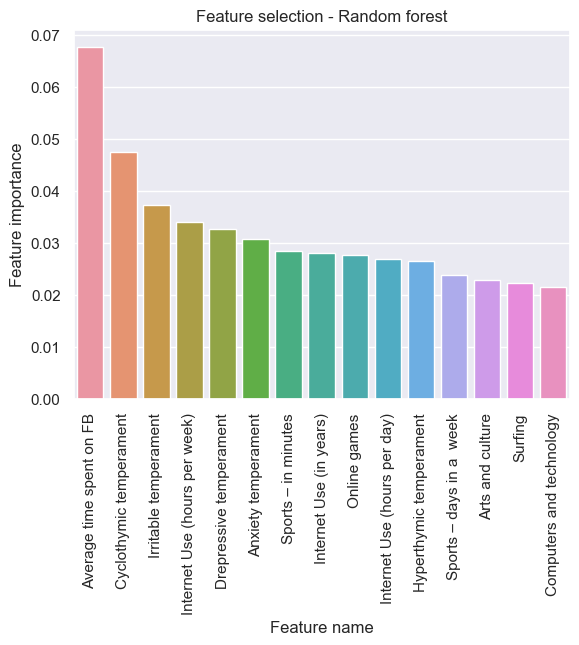

Fitting 10 folds for each of 90 candidates, totalling 900 fits
RandomForestClassifier(criterion='entropy', max_depth=9, max_features=5,
                       n_estimators=40)
Accuracy for model with feature selection: 0.73
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       242
         1.0       0.65      0.54      0.59       140

    accuracy                           0.73       382
   macro avg       0.70      0.69      0.69       382
weighted avg       0.72      0.73      0.72       382



In [137]:
#podesavanje hiperparametara za random forest
parameters = {'n_estimators':[10,20,40], 
              'criterion': ['gini', 'entropy'],
              'max_features': list(range(3,8)),
              'max_depth': [2,4,9]
               }
grid_search_cv = GridSearchCV(RandomForestClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela sa svim feature-ima
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {:.2f}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa selekcijom feature-a i preprocesiranim podacima
features_rf = feature_selection_random_forest(15)
best_model = grid_search_cv.fit(X_train_p[features_rf], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_rf])
print('Accuracy for model with feature selection: {:.2f}'.format(best_model.score(X_test_p[features_rf], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

In [138]:
#podesavanje hiperparametara za K-Nearest-Neighbors
parameters = {'n_neighbors': list(range (1,21)), 
              'metric': ['euclidean', 'manhattan', 'minkowski'], 
              'weights': ['uniform', 'distance']}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela sa svim feature-ima
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa preprocesiranim podacima i selekcijom feature-a

#treniranje modela sa Elastic-Net feature-ima

features_elastic = feature_selection_elasticnet_cv(20)
best_model = grid_search_cv.fit(X_train_p[features_elastic], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_elastic])
print('Accuracy for model with feature selection: {}'.format(best_model.score(X_test_p[features_elastic], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
KNeighborsClassifier(metric='euclidean', n_neighbors=16, weights='distance')
Accuracy for model with all features: 0.725130890052356
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.73      0.89      0.80       242
         1.0       0.70      0.44      0.54       140

    accuracy                           0.73       382
   macro avg       0.72      0.66      0.67       382
weighted avg       0.72      0.73      0.71       382

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')
Accuracy for model with feature selection: 0.7303664921465969
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       242
         1.0       0.68      0.51      0.58       140

In [139]:
#podesavanje hiperparametara za gradient boosting
parameters = {"n_estimators":[5,50,70],
              "max_depth":[1,3,5,7,9,11],
              "learning_rate":[0.01,0.1,1,10,100]}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela sa svim feature-ima
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa ElasticNet feature-ima i preprocesiranim podacima
features_elastic = feature_selection_elasticnet_cv(20)
best_model = grid_search_cv.fit(X_train_p[features_elastic], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_elastic])
print('Accuracy for model with feature selection: {}'.format(best_model.score(X_test_p[features_elastic], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
GradientBoostingClassifier(n_estimators=50)
Accuracy for model with all features: 0.7513089005235603
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       242
         1.0       0.68      0.60      0.64       140

    accuracy                           0.75       382
   macro avg       0.73      0.72      0.72       382
weighted avg       0.75      0.75      0.75       382

Fitting 10 folds for each of 90 candidates, totalling 900 fits
GradientBoostingClassifier(n_estimators=70)
Accuracy for model with feature selection: 0.7486910994764397
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       242
         1.0       0.67      0.62      0.64       140

    accuracy                           0.75       382
   macro avg 

In [140]:
#podesavanje hiperparametara za Naive Bayes
parameters = {'var_smoothing': np.logspace(0,-9,num=100)}
grid_search_cv = GridSearchCV(GaussianNB(), parameters,verbose=1,cv=10, n_jobs = -1)

#treniranje modela sa svim feature-ima i bez preprocesiranja podataka
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy for model with all features: {}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report for model with all features: ')
print(classification_report(y_test_p, y_preds))

#treniranje modela sa LassoCV feature-ima i preprocesiranim podacima 
features_elastic = feature_selection_lasso_cv(20)
best_model = grid_search_cv.fit(X_train_p[features_elastic], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_elastic])
print('Accuracy for model with feature selection: {}'.format(best_model.score(X_test_p[features_elastic], y_test_p)))
print('Classification report for model with feature selection: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.23101297000831597)
Accuracy for model with all features: 0.7408376963350786
Classification report for model with all features: 
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       242
         1.0       0.65      0.64      0.64       140

    accuracy                           0.74       382
   macro avg       0.72      0.72      0.72       382
weighted avg       0.74      0.74      0.74       382

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.02310129700083159)
Accuracy for model with feature selection: 0.7513089005235603
Classification report for model with feature selection: 
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       242
         1.0       0.64      0.72      0.68       140

    accuracy                           0.75       382
   ma

In [141]:
# k-fold cross-validation za razne modele ML-a
models = [
            ('Decision Tree', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)), 
            ('Gaussian Naive Bayes', GaussianNB(var_smoothing=0.23101297000831597)), 
            ('K-Nearest Neighbors', KNeighborsClassifier(metric='euclidean', n_neighbors=16, weights='distance')), 
            ('Random Forest', RandomForestClassifier(criterion='entropy', max_depth=9, max_features=6, n_estimators=40)),
            ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=50))]
results = []
results_accuracy = []
results_precision = []
results_recall = []
results_f1 = []
names = []
k_fold = StratifiedKFold(n_splits=10)
for name, model in models:
    cv_res = cross_validate(model, X_train_p, y_train_p, cv=k_fold, scoring=['accuracy', 'precision','recall','f1'])
    results.append(cv_res)
    results_accuracy.append(cv_res['test_accuracy'].mean())
    results_precision.append(cv_res['test_precision'].mean())
    results_recall.append(cv_res['test_recall'].mean())
    results_f1.append(cv_res['test_f1'].mean())
    names.append(name)

In [143]:
#tabelarni prikaz rezultata za razlicite modele bez preprocesiranja
diff_models_res = pd.DataFrame({'Model name': names,
                                'Accuracy': results_accuracy,
                                'Precision': results_precision, 
                                'Recall': results_recall,
                                'F1': results_f1})
print(diff_models_res)
#zaokurzivanje rezultata na 2 decimale
diff_models_res_round = diff_models_res.round(3)
print("\n")
print(diff_models_res_round)

                     Model name  Accuracy  Precision    Recall        F1
0                 Decision Tree  0.700507   0.630133  0.563870  0.592278
1          Gaussian Naive Bayes  0.720786   0.658239  0.591186  0.622122
2           K-Nearest Neighbors  0.697235   0.707528  0.381723  0.493070
3                 Random Forest  0.730611   0.724391  0.499972  0.590329
4  Gradient Boosting Classifier  0.735909   0.698379  0.564181  0.623191


                     Model name  Accuracy  Precision  Recall     F1
0                 Decision Tree     0.701      0.630   0.564  0.592
1          Gaussian Naive Bayes     0.721      0.658   0.591  0.622
2           K-Nearest Neighbors     0.697      0.708   0.382  0.493
3                 Random Forest     0.731      0.724   0.500  0.590
4  Gradient Boosting Classifier     0.736      0.698   0.564  0.623


In [144]:
#pomocni frejmovi za kasniji prikaz grafikona 
metrics = ['Accuracy','Precision','Recall','F1']
models = diff_models_res['Model name']
accuracy = diff_models_res['Accuracy']
precision = diff_models_res['Precision']
recall = diff_models_res['Recall']
f1 = diff_models_res['F1']
print(accuracy.round(3))

0    0.701
1    0.721
2    0.697
3    0.731
4    0.736
Name: Accuracy, dtype: float64


In [145]:
def dodajLabele(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i] , y[i], ha = 'center')

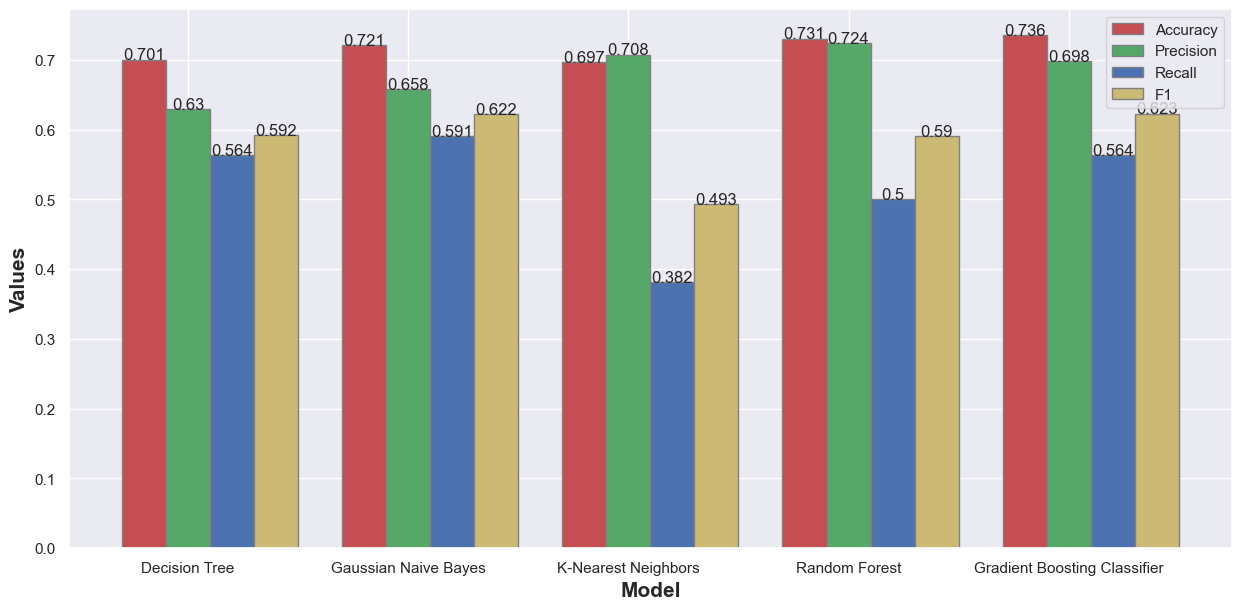

In [146]:
#kreiranje grafickog prikaza 
barWidth = 0.20
fig = plt.subplots(figsize =(15, 7))
metrics = ['Accuracy','Precision','Recall','F1']
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Values', fontweight ='bold', fontsize = 15)

br1 = np.arange(len(models))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x +barWidth for x in br3]

plt.xticks([r + barWidth for r in range(len(models))],
        models)

dodajLabele(br1,accuracy.round(3))
plt.bar(br1, accuracy, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy')

dodajLabele(br2, precision.round(3))
plt.bar(br2, precision, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision')

dodajLabele(br3, recall.round(3))
plt.bar(br3, recall, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall')

dodajLabele(br4, f1.round(3))
plt.bar(br4, f1, color ='y', width = barWidth,
        edgecolor ='grey', label ='F1')

plt.legend()
plt.show()

Deo sa metodama za selekciju feature-a

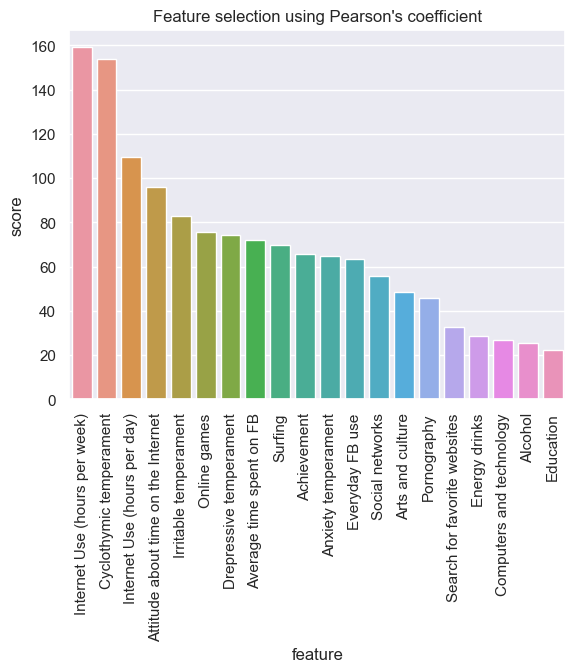

In [124]:
#feature selection sa Pearsonovim koeficijentom, input numericki, output numericki, za klasifikaciju
def feature_selection_pearson(n_features):
    best_features = SelectKBest(score_func = f_regression, k=n_features)
    calc_features = best_features.fit(X_cols_preprocessed,y_col_preprocessed)
    #odabir najboljih feature-a
    usefull_features = pd.DataFrame({'feature' : X_cols_preprocessed.columns.values, 'score' : calc_features.scores_})
    most_usefull_features = usefull_features.sort_values(by=['score'],ascending=False).head(n_features)
    #vizuelizacija dobijenih rezultata
    sns.set()
    plt.title('Feature selection using Pearson\'s coefficient')
    plt.xlabel('Feature score')
    plt.xticks(rotation=90)
    plt.ylabel('Naziv kolone')

    sns.barplot(x=most_usefull_features['feature'], y=most_usefull_features['score'])
    plt.show()
    feat_to_ret = most_usefull_features['feature']
    return feat_to_ret

results = feature_selection_pearson(20)

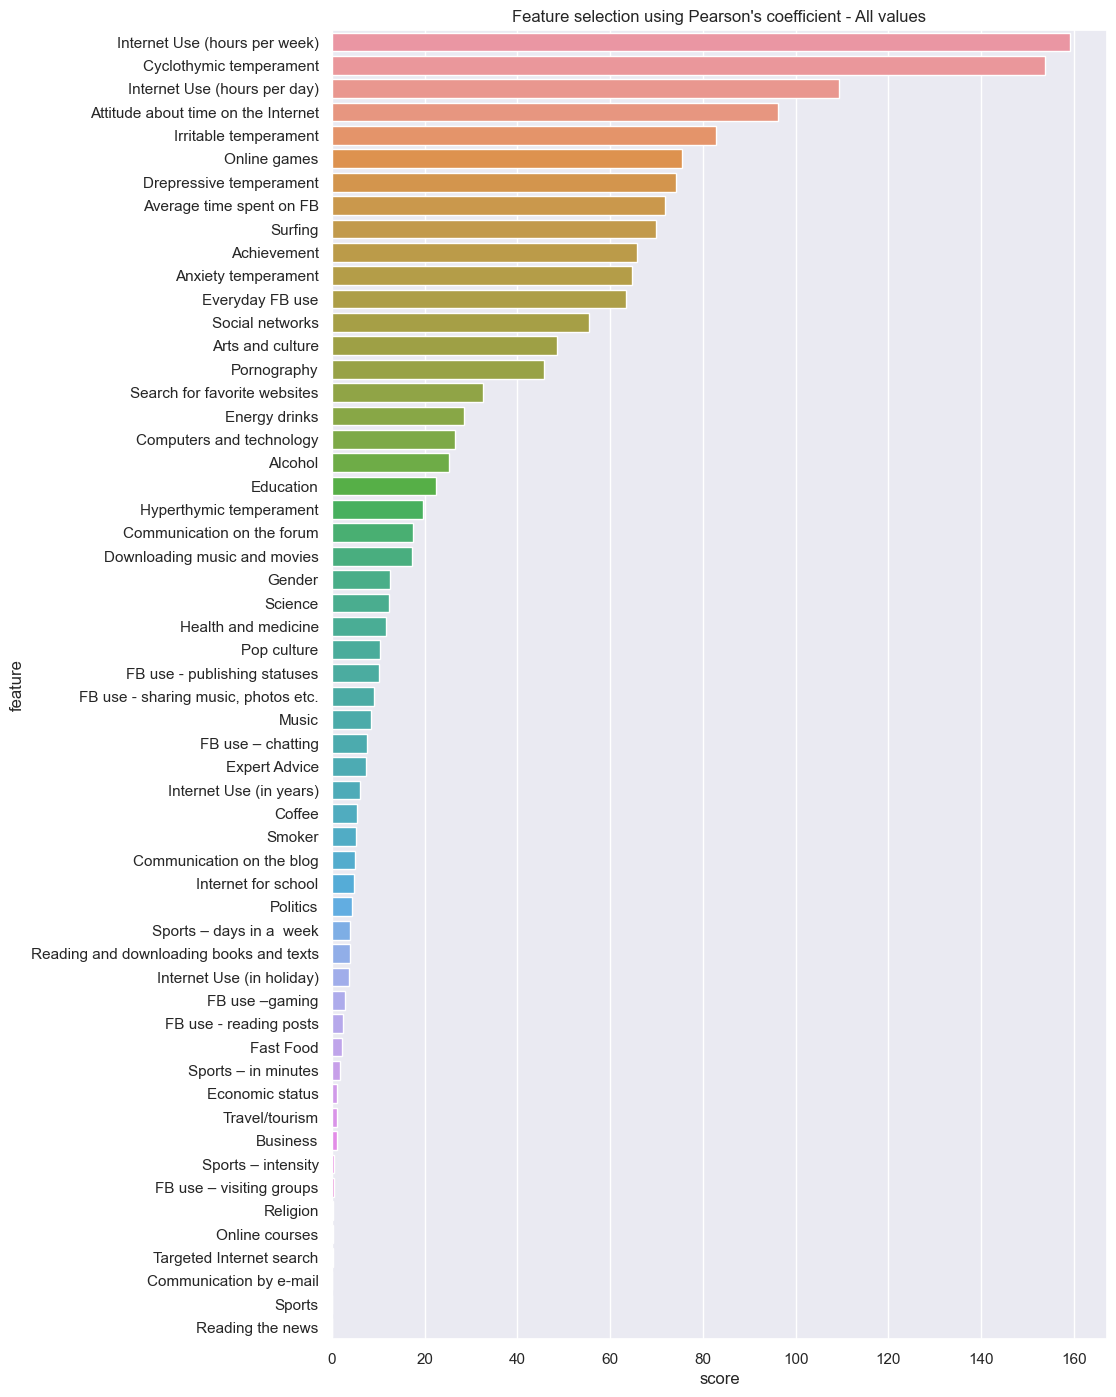

In [125]:
#feature selection sa Pearsonovim koeficijentom, input numericki, output numericki, za klasifikaciju
#varijanta sa prikazom svih atributa, nema negativnih vrednosti

def pearson_results_all():
    best_features = SelectKBest(score_func = f_regression, k='all')
    calc_features = best_features.fit(X_cols_preprocessed,y_col_preprocessed)
    #odabir najboljih feature-a
    usefull_features = pd.DataFrame({'feature' : X_cols_preprocessed.columns.values, 'score' : calc_features.scores_})
    usefull_features = usefull_features.sort_values(by=['score'],ascending=False)
    #vizuelizacija dobijenih rezultata
    plt.figure(figsize=(10,17))
    plt.title('Feature selection using Pearson\'s coefficient - All values')
    plt.xlabel('Feature score')
    plt.ylabel('Naziv kolone')

    sns.barplot(y=usefull_features['feature'], x=usefull_features['score'])
    plt.show()
    feat_to_ret = usefull_features['feature']

results = pearson_results_all()

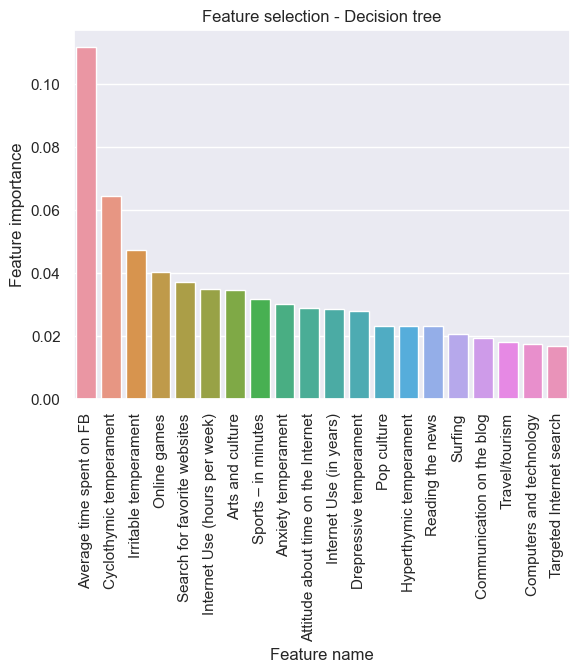

5                Average time spent on FB
12                Cyclothymic temperament
35                  Irritable temperament
38                           Online games
46           Search for favorite websites
31          Internet Use (hours per week)
3                        Arts and culture
51                    Sports – in minutes
2                     Anxiety temperament
4     Attitude about time on the Internet
33                Internet Use (in years)
14                Drepressive temperament
40                            Pop culture
29                Hyperthymic temperament
43                       Reading the news
53                                Surfing
9               Communication on the blog
55                         Travel/tourism
11               Computers and technology
54               Targeted Internet search
Name: attr_names, dtype: object

In [134]:
#feature selection za decision tree
decision_tree = DecisionTreeClassifier()
def feature_selection_decision_tree(n_features):
    sns.set()
    decision_tree.fit(X_cols_preprocessed, y_col_preprocessed)
    values = decision_tree.feature_importances_
    attr_names = X_cols_preprocessed.columns.values
    tree_features = pd.DataFrame({'attr_names':attr_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False).head(n_features)
    sns.barplot(x = tree_features['attr_names'], y=tree_features['values'])
    title = 'Feature selection - Decision tree'
    plt.title(title)
    plt.xlabel('Feature name')
    plt.xticks(rotation=90)
    plt.ylabel('Feature importance')
    plt.show()
    #cuvanje najkorisnijih feature-a
    best_decision_tree_features = tree_features['attr_names']
    return best_decision_tree_features
feature_selection_decision_tree(20)

In [135]:
#prikaz rezultata za sve feature vrednosti, nema negativnih vrednosti
#tabelarni prikaz, iznad se nalazi graficki prikaz 
def feature_score_dtc():
    sns.set()
    decision_tree.fit(X_cols_preprocessed, y_col_preprocessed)
    values = decision_tree.feature_importances_
    attr_names = X_cols_preprocessed.columns.values
    tree_features = pd.DataFrame({'attr_names':attr_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False)
    return tree_features
print(feature_score_dtc())

                                 attr_names    values
5                  Average time spent on FB  0.111825
12                  Cyclothymic temperament  0.070186
35                    Irritable temperament  0.054133
38                             Online games  0.039385
33                  Internet Use (in years)  0.037533
46             Search for favorite websites  0.036366
31            Internet Use (hours per week)  0.032415
3                          Arts and culture  0.031214
4       Attitude about time on the Internet  0.030908
51                      Sports – in minutes  0.029936
2                       Anxiety temperament  0.027647
14                  Drepressive temperament  0.027096
53                                  Surfing  0.023852
29                  Hyperthymic temperament  0.023223
9                 Communication on the blog  0.021497
43                         Reading the news  0.020934
32                Internet Use (in holiday)  0.019199
11                 Computers

                             attr_names    values
5              Average time spent on FB  0.060977
12              Cyclothymic temperament  0.053027
31        Internet Use (hours per week)  0.052207
2                   Anxiety temperament  0.033980
35                Irritable temperament  0.033403
38                         Online games  0.032714
30         Internet Use (hours per day)  0.031509
14              Drepressive temperament  0.028063
53                              Surfing  0.026037
33              Internet Use (in years)  0.026034
41                          Pornography  0.025467
51                  Sports – in minutes  0.025401
29              Hyperthymic temperament  0.023452
0                           Achievement  0.023382
3                      Arts and culture  0.022577
18                      Everyday FB use  0.021928
4   Attitude about time on the Internet  0.021607
11             Computers and technology  0.020702
48                      Social networks  0.020040


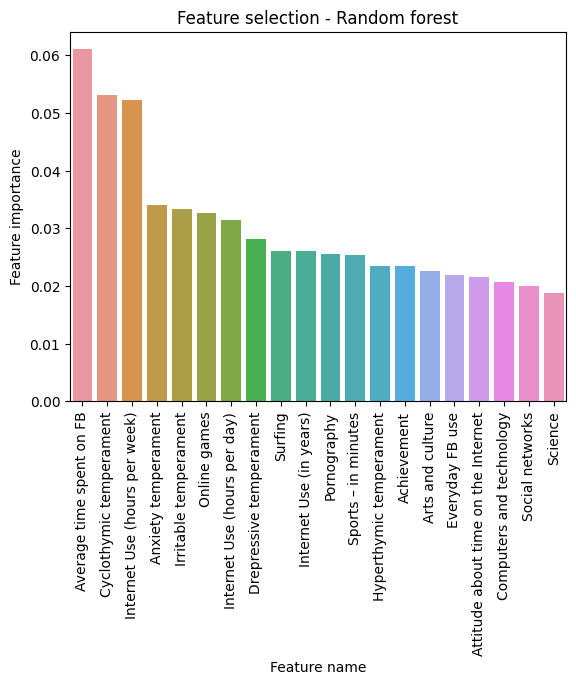

5                Average time spent on FB
12                Cyclothymic temperament
31          Internet Use (hours per week)
2                     Anxiety temperament
35                  Irritable temperament
38                           Online games
30           Internet Use (hours per day)
14                Drepressive temperament
53                                Surfing
33                Internet Use (in years)
41                            Pornography
51                    Sports – in minutes
29                Hyperthymic temperament
0                             Achievement
3                        Arts and culture
18                        Everyday FB use
4     Attitude about time on the Internet
11               Computers and technology
48                        Social networks
45                                Science
Name: attr_names, dtype: object

In [26]:
#feature selection za random forest
#graficki prikaz
random_forest = RandomForestClassifier(criterion='entropy', max_depth=9, max_features=6, n_estimators=40)
def feature_selection_random_forest(n_features):
    random_forest.fit(X_cols_preprocessed, y_col_preprocessed)
    values = random_forest.feature_importances_
    attr_names = X_cols_preprocessed.columns.values
    tree_features = pd.DataFrame({'attr_names':attr_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False).head(n_features)
    print(tree_features)
    sns.barplot(x = tree_features['attr_names'], y=tree_features['values'])
    title = 'Feature selection - Random forest'
    plt.title(title)
    plt.xlabel('Feature name')
    plt.xticks(rotation=90)
    plt.ylabel('Feature importance')
    plt.show()
    #cuvanje najkorisnijih feature-a
    best_random_forest_features = tree_features['attr_names']
    return best_random_forest_features
feature_selection_random_forest(20)

In [25]:
#feature score za random forest, nema negativnih vrednosti
#tabelarni prikaz, iznad se nalazi graficki
def feature_score_rfc():
    random_forest.fit(X_cols_preprocessed, y_col_preprocessed)
    values = random_forest.feature_importances_
    attr_names = X_cols_preprocessed.columns.values
    tree_features = pd.DataFrame({'attr_names':attr_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False)
    return tree_features
    
print(feature_score_rfc())

                                 attr_names    values
5                  Average time spent on FB  0.076903
12                  Cyclothymic temperament  0.060167
31            Internet Use (hours per week)  0.041616
38                             Online games  0.035207
30             Internet Use (hours per day)  0.034019
2                       Anxiety temperament  0.031423
35                    Irritable temperament  0.031338
14                  Drepressive temperament  0.029470
53                                  Surfing  0.026289
3                          Arts and culture  0.025685
4       Attitude about time on the Internet  0.023249
29                  Hyperthymic temperament  0.022983
33                  Internet Use (in years)  0.022952
51                      Sports – in minutes  0.022649
0                               Achievement  0.021044
50                 Sports – days in a  week  0.020686
41                              Pornography  0.020150
48                          

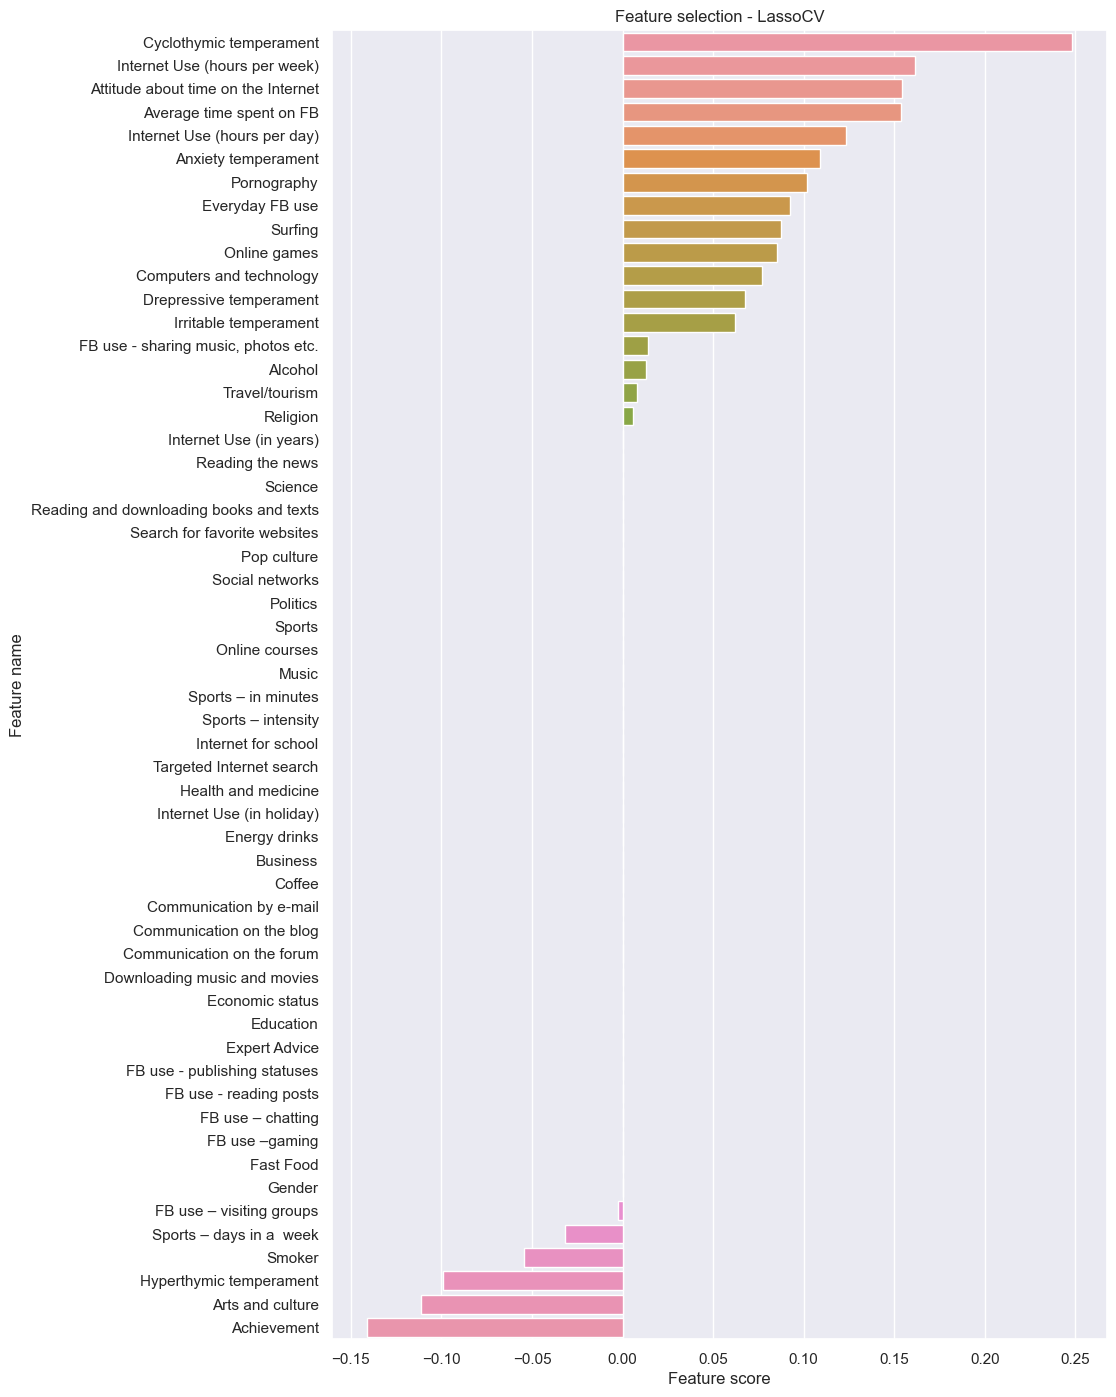

In [130]:
#feature score sa LassoCV modelom 
#u ovom slucaju je moguce dobijanje i pozitivnih i negativnih vrednosti
#graficki prikaz
def feature_score_lasso_cv():
    lasso = LassoCV(cv=3)                                                   
    lasso.fit(X_cols_preprocessed, y_col_preprocessed)      
    lasso_values = lasso.coef_
    attr_names = X_cols_preprocessed.columns.values
    lasso_features = pd.DataFrame({'attr_names':attr_names, 'values':lasso_values})
    lasso_features = lasso_features.sort_values(by='values', ascending=False)  
    plt.figure(figsize=(10,17))
    sns.barplot(y = lasso_features['attr_names'], x=lasso_features['values'])
    title = 'Feature selection - LassoCV'
    plt.title(title)
    plt.xlabel('Feature score')
    plt.ylabel('Feature name')
    plt.show()
feature_score_lasso_cv()

In [131]:
#feature selection sa LassoCV modelom 
#tabelarni prikaz sa apsolutnim vrednostima (uzet znacaj kolone nezavisno od znaka)
def feature_selection_lasso_cv(n_features):
    lasso = LassoCV(cv=3)                                                   
    lasso.fit(X_cols_preprocessed, y_col_preprocessed)      
    lasso_values = lasso.coef_
    attr_names = X_cols_preprocessed.columns.values
    #lasso_features = pd.DataFrame({'attr_names':attr_names, 'values': lasso_values})
    lasso_features_abs = pd.DataFrame({'attr_names':attr_names, 'values': abs(lasso_values)})
    lasso_features_abs = lasso_features_abs.sort_values(by='values', ascending=False).head(n_features)       
    #cuvanje najkorisnijih feature-a
    best_lasso_features_abs = lasso_features_abs['attr_names']
    return best_lasso_features_abs
feature_selection_lasso_cv(20)

12                Cyclothymic temperament
31          Internet Use (hours per week)
4     Attitude about time on the Internet
5                Average time spent on FB
0                             Achievement
30           Internet Use (hours per day)
3                        Arts and culture
2                     Anxiety temperament
41                            Pornography
29                Hyperthymic temperament
18                        Everyday FB use
53                                Surfing
38                           Online games
11               Computers and technology
14                Drepressive temperament
35                  Irritable temperament
47                                 Smoker
50               Sports – days in a  week
22    FB use - sharing music, photos etc.
1                                 Alcohol
Name: attr_names, dtype: object

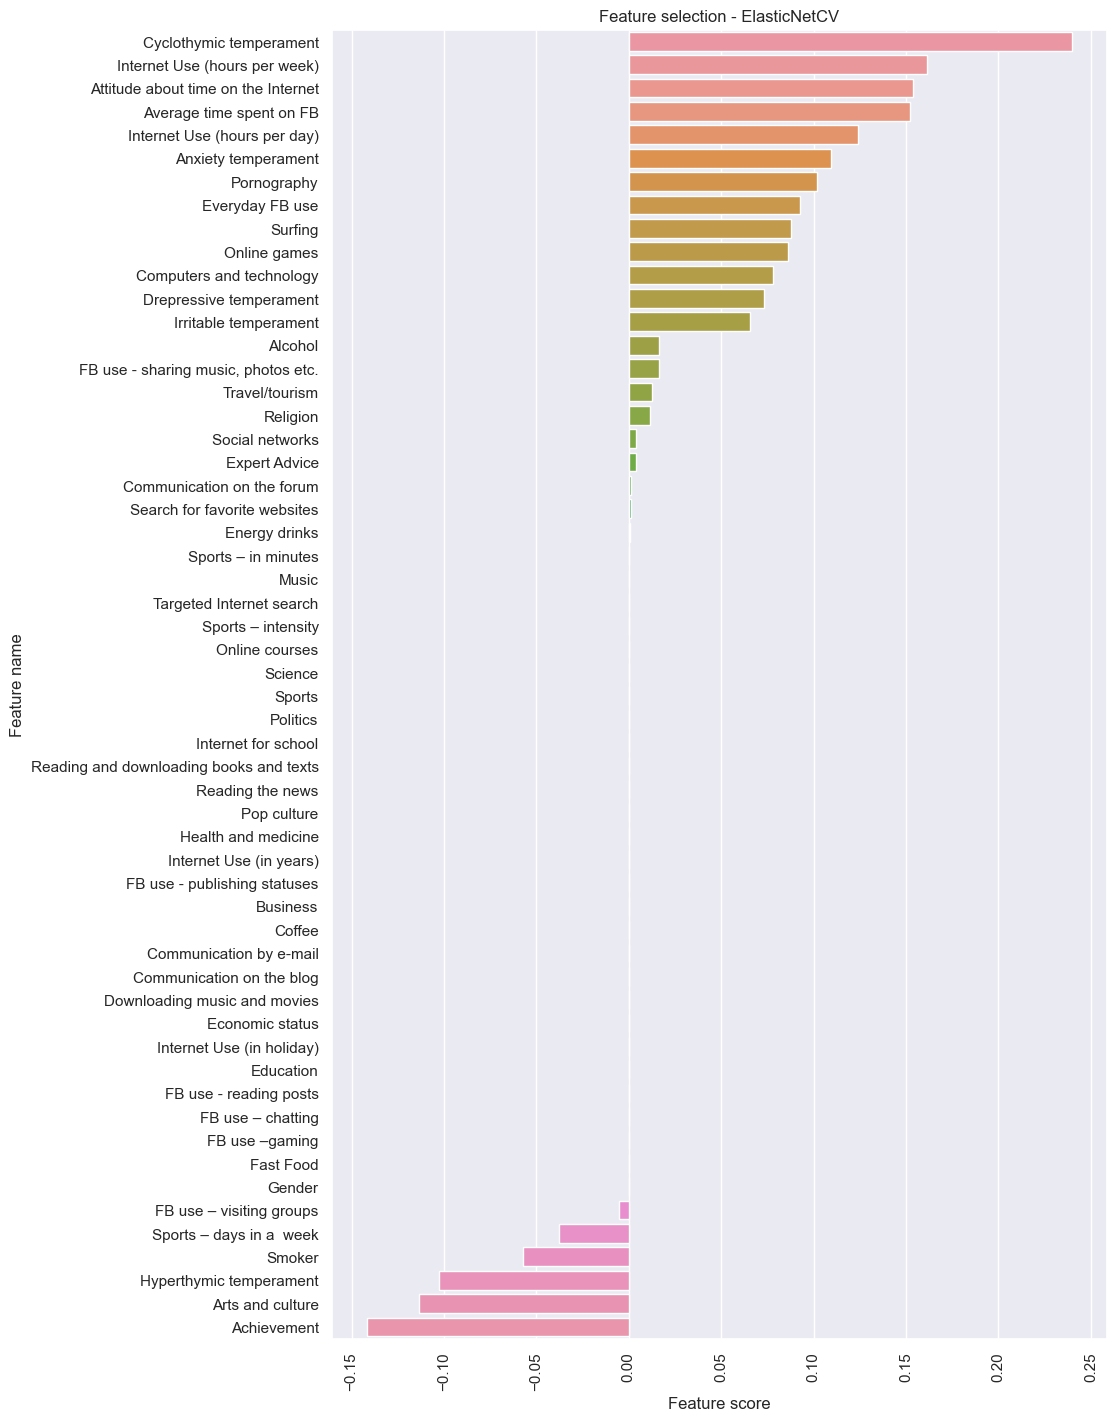

In [132]:
#feature selection koriscenjem ElasticNetCV modela
def feature_score_elasticnet_cv():
    el_net = ElasticNetCV(cv=3)
    el_net.fit(X_cols_preprocessed, y_col_preprocessed)
    el_net_values = el_net.coef_
    attr_names = X_cols_preprocessed.columns.values
    el_net_features = pd.DataFrame({'attr_names':attr_names, 'values':el_net_values})
    el_net_features = el_net_features.sort_values(by='values', ascending=False)  
    plt.figure(figsize=(10,17))
    sns.barplot(y = el_net_features['attr_names'], x =el_net_features['values'])
    title = 'Feature selection - ElasticNetCV'
    plt.title(title)
    plt.xlabel('Feature score')
    plt.xticks(rotation=90)
    plt.ylabel('Feature name')
    plt.show()
feature_score_elasticnet_cv()

In [133]:
#feature selection koriscenjem ElasticNetCV modela
#tabelarni prikaz sa apsolutnim vrednostima (uzet znacaj kolone nezavisno od znaka)
def feature_selection_elasticnet_cv(n_features):
    el_net = ElasticNetCV(cv=3)
    el_net.fit(X_cols_preprocessed, y_col_preprocessed)
    el_net_values = el_net.coef_
    attr_names = X_cols_preprocessed.columns.values
    el_net_features = pd.DataFrame({'attr_names':attr_names, 'values': abs(el_net_values)})
    el_net_features = el_net_features.sort_values(by='values', ascending=False).head(n_features)       
    #cuvanje najkorisnijih feature-a
    best_el_net_features = el_net_features['attr_names']
    return best_el_net_features
print(feature_selection_elasticnet_cv(20))

12                Cyclothymic temperament
31          Internet Use (hours per week)
4     Attitude about time on the Internet
5                Average time spent on FB
0                             Achievement
30           Internet Use (hours per day)
3                        Arts and culture
2                     Anxiety temperament
29                Hyperthymic temperament
41                            Pornography
18                        Everyday FB use
53                                Surfing
38                           Online games
11               Computers and technology
14                Drepressive temperament
35                  Irritable temperament
47                                 Smoker
50               Sports – days in a  week
1                                 Alcohol
22    FB use - sharing music, photos etc.
Name: attr_names, dtype: object


In [155]:
#genetski algoritmi
parameters = {'n_estimators':[10,50,100], 
              'criterion': ['gini', 'entropy'],
              'max_features': list(range(3,8)),
              'max_depth': [2,4,9]
               }
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 11),
              'max_leaf_nodes': Integer(2, 15),
              'n_estimators': Integer(100,300)}

clf = RandomForestClassifier()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                              cv=cv,
                              scoring='accuracy',
                              n_jobs=-1,
                              param_grid = param_grid,
                              verbose=True)

evolved_estimator.fit(X_train_p, y_train_p)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.661259	0.0411333  	0.728695   	0.612056   
1  	100   	0.691102	0.0307398  	0.725432   	0.612058   
2  	100   	0.711142	0.0125384  	0.72674    	0.673663   
3  	100   	0.720839	0.00603929 	0.72674    	0.701843   
4  	100   	0.724851	0.00360855 	0.731988   	0.711005   
5  	100   	0.725662	0.00341168 	0.731988   	0.716907   
6  	100   	0.726634	0.00318263 	0.731988   	0.718224   
7  	100   	0.724877	0.00470395 	0.731988   	0.710367   
8  	100   	0.72547 	0.00377356 	0.731968   	0.716908   
9  	100   	0.727198	0.0046899  	0.733286   	0.706435   
10 	100   	0.727837	0.00380804 	0.735906   	0.716887   
11 	100   	0.727705	0.00312508 	0.732629   	0.718853   
12 	100   	0.727442	0.00369909 	0.732629   	0.71363    
13 	100   	0.726579	0.00329803 	0.731318   	0.720166   
14 	100   	0.72671 	0.00354557 	0.731318   	0.716917   
15 	100   	0.727234	0.00294317 	0.732643   	0.716922   
16 	100   	0.726918	0.00368114 	0.73395    	0.71

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(bootstrap=False, max_depth=8,
                                            max_leaf_nodes=12,
                                            min_weight_fraction_leaf=0.01961461770193928,
                                            n_estimators=231),
           n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x000001E070D5B390>,
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x000001E070A370D0>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x000001E070D7B950>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x000001E070CE7F10>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x000001E070D5AB10>},
           return_train_score=True, scoring='accuracy')

In [156]:
#rezultati koriscenjem genetskih algoritama
y_predict_ga = evolved_estimator.predict(X_test_p)
print(accuracy_score(y_test_p, y_predict_ga))

0.756544502617801


In [157]:
#feature selection koriscenjem genetskih algoritama
clf = RandomForestClassifier()
evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)
evolved_estimator.fit(X_train_p, y_train_p)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.694362	0.0208691  	0.733937   	0.642199   
1  	60    	0.709739	0.0122634  	0.725414   	0.676938   
2  	60    	0.71262 	0.0122682  	0.730004   	0.682159   
3  	60    	0.717252	0.00723262 	0.730662   	0.700513   
4  	60    	0.715592	0.0128559  	0.730662   	0.675627   
5  	60    	0.716225	0.0148419  	0.730669   	0.669072   
6  	60    	0.720289	0.00730115 	0.730662   	0.701184   
7  	60    	0.720857	0.00897879 	0.730662   	0.69724    
8  	60    	0.717405	0.0144065  	0.735901   	0.684132   
9  	60    	0.719369	0.0138459  	0.735901   	0.68609    
10 	60    	0.722013	0.0114713  	0.735901   	0.695274   
11 	60    	0.724045	0.0117979  	0.735901   	0.692672   
12 	60    	0.719916	0.0150964  	0.735901   	0.692661   
13 	60    	0.720354	0.0146109  	0.735901   	0.679544   
14 	60    	0.721487	0.0124594  	0.735901   	0.68348    
15 	60    	0.723236	0.0134784  	0.73394    	0.678893   
16 	60    	0.723497	0.0122631  	0.73394    	0.68

GAFeatureSelectionCV(estimator=RandomForestClassifier(), generations=20,
                     keep_top_k=2, n_jobs=-1, population_size=30,
                     scoring='accuracy')

In [158]:
#feature selection koriscenjem genetskih alogiritama 
gen_opt_features = evolved_estimator.best_features_
gen_df = pd.DataFrame({'feature': X_train_p.columns, 'is_used':gen_opt_features})

def highlight_cells(val):
    color = 'yellow' if val == True else ''
    return 'background-color: {}'.format(color)

selected_features = gen_df[gen_df['is_used'] == True]['feature']
gen_df.style.applymap(highlight_cells)

,feature,is_used
0,Achievement,False
1,Alcohol,False
2,Anxiety temperament,False
3,Arts and culture,True
4,Attitude about time on the Internet,False
5,Average time spent on FB,True
6,Business,True
7,Coffee,True
8,Communication by e-mail,True
9,Communication on the blog,True


In [151]:
#neuronske mreze za klasifikaciju
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter= 100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)
trained_model = mlp.fit(X_train_p, y_train_p)
y_preds = trained_model.predict(X_test_p)
plt.show()
print('Accuracy for MLP: {:.2f}'.format(trained_model.score(X_test_p, y_test_p)))
print('Classification report for MLP: ')
print(classification_report(y_test_p, y_preds))

Iteration 1, loss = 0.71567461
Iteration 2, loss = 0.59223938
Iteration 3, loss = 0.55064571
Iteration 4, loss = 0.56779421
Iteration 5, loss = 0.53434902
Iteration 6, loss = 0.51800617
Iteration 7, loss = 0.51631334
Iteration 8, loss = 0.50778906
Iteration 9, loss = 0.51450277
Iteration 10, loss = 0.51101617
Iteration 11, loss = 0.49171356
Iteration 12, loss = 0.48797608
Iteration 13, loss = 0.48637238
Iteration 14, loss = 0.48152670
Iteration 15, loss = 0.47296060
Iteration 16, loss = 0.47141260
Iteration 17, loss = 0.47199592
Iteration 18, loss = 0.45939814
Iteration 19, loss = 0.46602563
Iteration 20, loss = 0.44543273
Iteration 21, loss = 0.45520423
Iteration 22, loss = 0.48837766
Iteration 23, loss = 0.43721460
Iteration 24, loss = 0.46186915
Iteration 25, loss = 0.43140689
Iteration 26, loss = 0.44503815
Iteration 27, loss = 0.42594482
Iteration 28, loss = 0.40776981
Iteration 29, loss = 0.40258398
Iteration 30, loss = 0.41374625
Iteration 31, loss = 0.39610998
Iteration 32, los

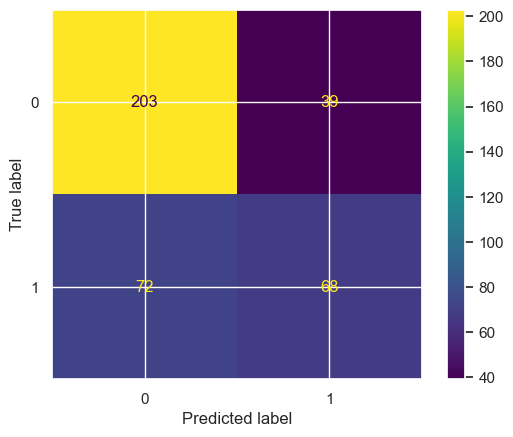

In [152]:
#matrica konfuzije za neuronsku mrezu
cm = confusion_matrix(y_test_p, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [153]:
#prikaz globalne interpretabilnosti uz Permutation Importance iz eli5 biblioteke
grad_boost = mlp.fit(X_train_p, y_train_p)
permutation = PermutationImportance(grad_boost, scoring = 'accuracy')
permutation_model = permutation.fit(X_train_p, y_train_p)
eli5.show_weights(permutation_model, feature_names = list(input_cols.columns))

Iteration 1, loss = 0.71567461
Iteration 2, loss = 0.59223938
Iteration 3, loss = 0.55064571
Iteration 4, loss = 0.56779421
Iteration 5, loss = 0.53434902
Iteration 6, loss = 0.51800617
Iteration 7, loss = 0.51631334
Iteration 8, loss = 0.50778906
Iteration 9, loss = 0.51450277
Iteration 10, loss = 0.51101617
Iteration 11, loss = 0.49171356
Iteration 12, loss = 0.48797608
Iteration 13, loss = 0.48637238
Iteration 14, loss = 0.48152670
Iteration 15, loss = 0.47296060
Iteration 16, loss = 0.47141260
Iteration 17, loss = 0.47199592
Iteration 18, loss = 0.45939814
Iteration 19, loss = 0.46602563
Iteration 20, loss = 0.44543273
Iteration 21, loss = 0.45520423
Iteration 22, loss = 0.48837766
Iteration 23, loss = 0.43721460
Iteration 24, loss = 0.46186915
Iteration 25, loss = 0.43140689
Iteration 26, loss = 0.44503815
Iteration 27, loss = 0.42594482
Iteration 28, loss = 0.40776981
Iteration 29, loss = 0.40258398
Iteration 30, loss = 0.41374625
Iteration 31, loss = 0.39610998
Iteration 32, los

Weight,Feature
0.0541 ± 0.0089,Internet Use (hours per week)
0.0426 ± 0.0060,FB use - reading posts
0.0406 ± 0.0115,Sports
0.0371 ± 0.0099,Pornography
0.0362 ± 0.0074,Internet Use (hours per day)
0.0320 ± 0.0055,Alcohol
0.0304 ± 0.0060,Irritable temperament
0.0292 ± 0.0076,Achievement
0.0283 ± 0.0084,Coffee
0.0267 ± 0.0086,FB use – visiting groups


In [39]:
#auto-sklearn za klasifikaciju, moguce pokrenuti samo na Linux sistemu
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", accuracy_score(y_test, y_hat))
print(automl.leaderboard())

Accuracy score 0.746268656716418
          rank  ensemble_weight           type      cost  duration
model_id                                                          
5            1             0.14  random_forest  0.242938  2.457265
18           2             0.04  random_forest  0.244821  2.536645
2            3             0.20  random_forest  0.246704  2.158461
6            4             0.08  random_forest  0.246704  2.341989
15           5             0.08  random_forest  0.256121  2.601341
11           6             0.16  random_forest  0.258004  3.490302
16           7             0.30    extra_trees  0.265537  6.225641
